Tamanho do conjunto de treino: (800, 7)
Tamanho do conjunto de teste: (200, 7)
Acurácia do modelo: 23.50%
              precision    recall  f1-score   support

           0       0.20      0.21      0.20        48
           1       0.19      0.19      0.19        47
           2       0.22      0.27      0.24        52
           3       0.37      0.26      0.31        53

    accuracy                           0.23       200
   macro avg       0.24      0.23      0.24       200
weighted avg       0.25      0.23      0.24       200



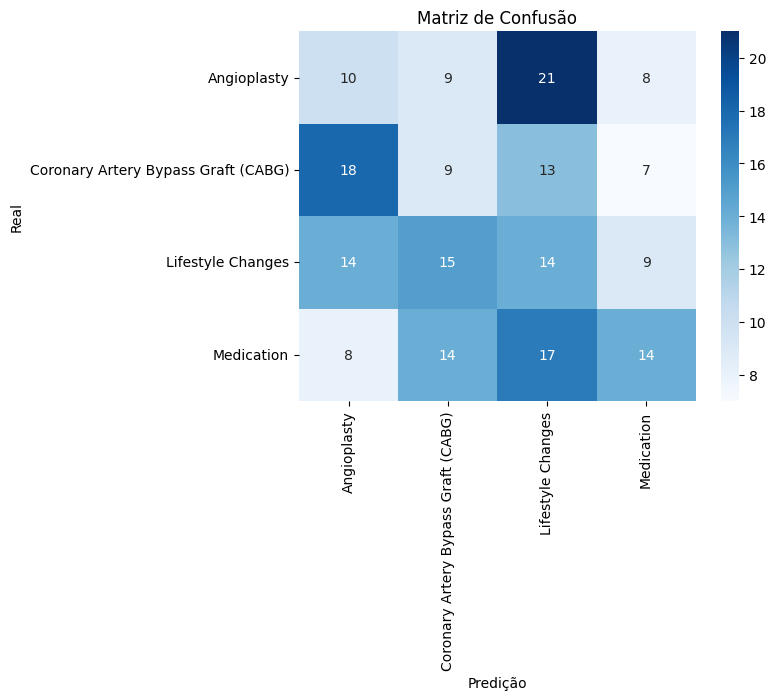

In [ ]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Importação e leitura do dataset AtaqueCardiaco
df = pd.read_csv('/content/datasetAtaqueCardiaco.csv')

df.head()

# MODELO RANDOM FOREST CLASSFIER

# Verificar se há dados faltantes
df.isnull().sum()

# Substituir valores ausentes ou eliminando colunas com dados ausentes
df = df.dropna()

# Codificar variáveis categóricas com LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male=1, Female=0
df['Has Diabetes'] = label_encoder.fit_transform(df['Has Diabetes'])  # Yes=1, No=0
df['Smoking Status'] = label_encoder.fit_transform(df['Smoking Status'])  # Never=0, Current=1, etc.
df['Chest Pain Type'] = label_encoder.fit_transform(df['Chest Pain Type'])  # Codificando tipos de dor
df['Treatment'] = label_encoder.fit_transform(df['Treatment'])  # Tratamentos como variável alvo

# Visualizan as primeiras linhas após o pré-processamento
df.head()

# Definin as variáveis independentes (X) e dependente (y)
X = df.drop('Treatment', axis=1)  # Removendo a coluna 'Treatment' para ser a variável alvo
y = df['Treatment']  # Variável alvo

# Dividindir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizan as dimensões dos dados de treino e teste
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

# Criar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinar o modelo com os dados de treino
model.fit(X_train, y_train)

# Fazer previsões com os dados de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()



